In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json
from collections import Counter

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20180715"))
article_df = article_df.reset_index(drop = True)
event_names = np.unique(article_df["event"].dropna())
print(event_names)
display(article_df.head(3))

labels_path = os.path.join(data_folder, "Helsinki_labels", "helsinki_labels.json")
with open(labels_path, encoding = "utf8") as json_file:
    labels = json.load(json_file)
print(labels.keys())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,wsbtv.com,2018-07-16T01:02:26-04:00,True,https://www.wsbtv.com/news/local/cobb-county/p...,"Police: Missing teen with autism found, reunit...","Police: Missing teen with autism found, reunit...","{'wordCounts': {'1533': 10, '367': 3, '2619': ...",NaN,None,0.0
1,1,wn.com,2018-07-16T04:51:37-04:00,False,https://wn.com/Apostolic_Constitutions,Apostolic s,Apostolic Constitutions ### back to playlist #...,"{'wordCounts': {'147633': 5, '5029': 6, '546':...",NaN,None,0.0
2,2,lufkindailynews.com,2018-07-15T22:48:17-04:00,False,http://lufkindailynews.com/news/sports/article...,No refuge from politics but France victory a f...,No refuge from politics but France victory a f...,"{'wordCounts': {'2782': 6, '534': 7, '5473': 1...",0.0,None,0.0


dict_keys(['lower', 'upper', 'population', 'urls'])


In [5]:
labels["population"]

['hotair.com/archives/2018/07/19/todays-hot-topics-helsinki-fallout-kavanaugh-debate-judge-jeanne-pirro',
 'dailymail.co.uk/wires/reuters/article-5961005/u-n-chief-demands-end-nicaragua-violence-hundreds-protest-ortega.html',
 'startribune.com/twin-cities-concerts-of-the-week-sylvan-esso-luke-bryan-x-games-my-bloody-valentine/488652271',
 'beforeitsnews.com/u-s-politics/2018/07/rush-if-democrats-win-youll-never-hear-another-word-about-tainted-elections-2558433.html',
 'yahoo.com/news/m/72e666cc-c4bb-348a-9b47-025b67a60028/ss_scott-walker-is-mum-on-russia.html',
 'dailymail.co.uk/wires/aap/article-5961151/broncos-boyd-hopeful-early-bird-return.html',
 'centurylink.net/news/read/category/news/article/the_associated_press-glance_a_look_at_corey_stewarts_past-ap',
 'sfgate.com/news/world/article/q-a-world-trade-organization-s-role-in-us-china-13078835.php',
 'dailymail.co.uk/wires/reuters/article-5969815/syrian-rebels-agree-surrender-terms-al-quneitra-hezbollah-run-news-service.html',
 'fo

In [2]:
article_df["url"] = labels['urls']

In [3]:
len(labels["population"]), len(labels["upper"]), len(labels["lower"])

(1925, 718, 492)

In [4]:
pop_ids = [article_df["id"][i] for i in range(len(article_df)) if article_df.loc[i, "url"] in set(labels["population"]) - set(labels["upper"])]
lower_ids = [article_df["id"][i] for i in range(len(article_df)) if article_df.loc[i, "url"] in labels["lower"]]
upper_ids = [article_df["id"][i] for i in range(len(article_df)) if article_df.loc[i, "url"] in (set(labels["upper"]) - set(labels["lower"]))]
full_ids = pop_ids + lower_ids + upper_ids
print(len(pop_ids), len(lower_ids), len(upper_ids))
len([i for i in range(len(article_df)) if article_df.loc[i, "url"] in set(labels["population"])]) 
# 284 total, 173, 68, 43 unique in each set 

173 68 43


284

In [6]:
dd = comparisons.DuplicationDetection()
dd.entities = True
mc = machine.MultiComparisons()

In [7]:
pop_dict = dd.dict_by_ids(article_df, pop_ids)
lower_dict = dd.dict_by_ids(article_df, lower_ids)
upper_dict = dd.dict_by_ids(article_df, upper_ids)
full_dict = {**pop_dict, **upper_dict, **lower_dict}

In [18]:
len(pop_ids)

173

In [16]:
helsinki_df = article_df.loc[full_ids, ].drop(columns = "paywall")
helsinki_df

,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc
461,461,dailymail.co.uk,2018-07-15T06:34:13-04:00,False,dailymail.co.uk/wires/reuters/article-5955039/...,"Manager, Harper mum on lack-of-hustle conversati","Sunday, Jul 15th 2018 5-Day Forecast ### Adver...","{'wordCounts': {'25': 1, '3007': 1, '733': 1, ...",NaN,"Sunday, Jul 15th 2018 5-Day Forecast\n Manager..."
1052,1052,yahoo.com/news,2018-07-15T06:53:51-04:00,True,yahoo.com/news/theresa-may-reveals-donald-trum...,reveals told her to sue the EU over Brexit,Theresa May reveals Donald Trump told her to s...,"{'wordCounts': {'6589': 3, '1484': 4, '2687': ...",10.0,Theresa May reveals Donald Trump told her to s...
2155,2155,bbc.co.uk,2018-07-15T06:53:14-04:00,False,bbc.co.uk/news/av/world-us-canada-39763413/tru...,Trump: N Korea's Kim Jong-un a 'smart cookie,These are external links and will open in a ne...,"{'wordCounts': {'7334': 1, '1836': 1, '768': 1...",39.0,These are external links and will open in a ne...
3492,3492,news.google.com,2018-07-15T06:56:49-04:00,True,news.google.com/stories/caaqoqgkijndqkltsurvsm...,NaN,share ### more_vert ### US President Donald Tr...,"{'wordCounts': {'309': 1, '798653': 1, '1149':...",10.0,US President Donald Trump (L) speaks during a...
3995,3995,chicagotribune.com,2018-07-15T07:15:36-04:00,False,chicagotribune.com/90minutes/ct-90mins-five-re...,Five reasons why France will win the World Cup,Five reasons why France will win the World Cup...,"{'wordCounts': {'553': 1, '5473': 22, '601': 6...",0.0,Five reasons why France will win the World Cup...
...,...,...,...,...,...,...,...,...,...,...
105557,105557,beforeitsnews.com,2018-07-16T02:57:39-04:00,True,beforeitsnews.com/opinion-conservative/2018/07...,1918: Romanov family executed | Opinion - Cons...,"1918: Romanov family executed ### Sunday, July...","{'wordCounts': {'20717': 2, '122909': 1, '585'...",39.0,"1918: Romanov family executed\n Sunday, July 1..."
109262,109262,yahoo.com/news,2018-07-15T07:30:37-04:00,False,yahoo.com/news/death-leaks-russian-hacking-hel...,Death by leaks: Russian hacking helped sink Cl...,Death by leaks: Russian hacking helped sink Cl...,"{'wordCounts': {'2141': 1, '1487': 11, '2686':...",NaN,Death by leaks: Russian hacking helped sink Cl...
110302,110302,dailycaller.com,2018-07-15T14:58:18-04:00,True,dailycaller.com/2018/07/15/tom-perez-dnc-hacking,DNC Chair Tom Perez Squirms Away From Question...,DNC Chair Tom Perez Squirms Away From Question...,"{'wordCounts': {'6493': 5, '660': 1, '1601': 2...",39.0,DNC Chair Tom Perez Squirms Away From Question...
119198,119198,centurylink.net/news,2018-07-15T15:25:29-04:00,True,centurylink.net/news/read/article/the_associat...,"France wins 2nd World Cup title, beats Croatia...",powered by Ask ### / ### Security stewards rem...,"{'wordCounts': {'488': 2, '1540': 2, '8779': 2...",0.0,Security stewards remove people who ran onto ...


In [7]:
cosine_sims = []
for i in range(0, len(full_dict)):
    for j in range(i, len(full_dict)):
        cosine_sims.append(utils.cosinesim(full_dict[full_ids[i]].vec, full_dict[full_ids[j]].vec))

array([0.84876235, 0.89743826, 0.93278867, 0.95605488, 0.97050793])

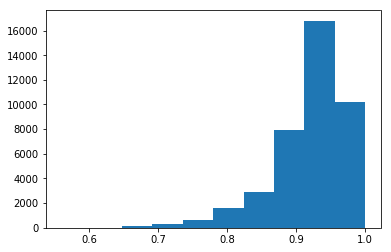

In [8]:
plt.hist(cosine_sims)
np.percentile(cosine_sims, [10, 25, 50, 75, 90])

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity == 0, skipping
Entities similarity 

0.9154929577464789

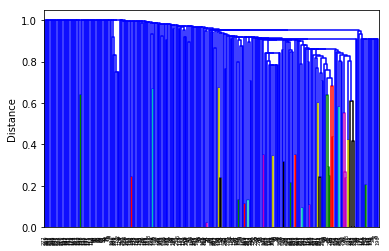

In [9]:
sim_mat = dd.similarity_mat(full_dict)
dd.cluster_articles(sim_mat, plot = True)
dd.prop_unique_clusters(thresh_same_doc = 0.5)

Text(0, 0.5, '% Unique documents')

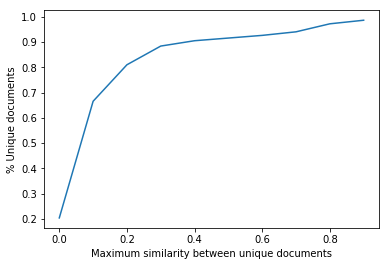

In [10]:
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")

array([0.        , 0.        , 0.13823529])

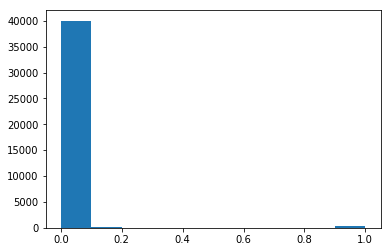

In [11]:
sims = sim_mat[np.triu_indices(np.min(sim_mat.shape))]
plt.hist(sims)
np.percentile(sims, [90, 95, 99])

In [12]:
Counter(dd.get_cluster_assignments(thresh_same_doc = 0.3)).most_common(20)

[(167, 5),
 (13, 4),
 (21, 4),
 (37, 3),
 (3, 2),
 (12, 2),
 (34, 2),
 (39, 2),
 (48, 2),
 (62, 2),
 (72, 2),
 (90, 2),
 (96, 2),
 (97, 2),
 (100, 2),
 (108, 2),
 (118, 2),
 (138, 2),
 (181, 2),
 (194, 2)]

In [13]:
popclusters = dd.get_cluster_assignments()
for clust in np.unique(popclusters):
    ids = np.array(pop_ids + upper_ids + lower_ids)[np.where(np.array(popclusters) == clust)[0]]
    if len(ids) < 2:
        continue
    pids = [i for i in ids if i in pop_ids]
    uids = [i for i in ids if i in upper_ids]
    lids = [i for i in ids if i in lower_ids]
    num0 = sum(np.array([len(pids), len(uids), len(lids)]) == 0)
    if num0 < 2:
        print("Cluster %d: %d population, %d upper, %d lower" % (clust, len(pids), len(uids), len(lids)))
        print(ids, pids, uids, lids)
        print("___Articles in multiple clusters!\n")

Cluster 21: 3 population, 1 upper, 0 lower
[ 14774  41674  58841 119198] [14774, 41674, 58841] [119198] []
___Articles in multiple clusters!

Cluster 90: 1 population, 1 upper, 0 lower
[69503  3895] [69503] [3895] []
___Articles in multiple clusters!

Cluster 96: 1 population, 1 upper, 0 lower
[71770 89710] [71770] [89710] []
___Articles in multiple clusters!

Cluster 100: 1 population, 1 upper, 0 lower
[ 73564 101198] [73564] [101198] []
___Articles in multiple clusters!

Cluster 108: 1 population, 1 upper, 0 lower
[77299  8115] [77299] [8115] []
___Articles in multiple clusters!

Cluster 118: 1 population, 1 upper, 0 lower
[86248 46583] [86248] [46583] []
___Articles in multiple clusters!

Cluster 138: 1 population, 1 upper, 0 lower
[102411  74781] [102411] [74781] []
___Articles in multiple clusters!

Cluster 167: 0 population, 2 upper, 3 lower
[ 32747  73171  41587  67088 103922] [] [32747, 73171] [41587, 67088, 103922]
___Articles in multiple clusters!

Cluster 181: 0 population, 

0 of 1 rows completed, 0.00m elapsed


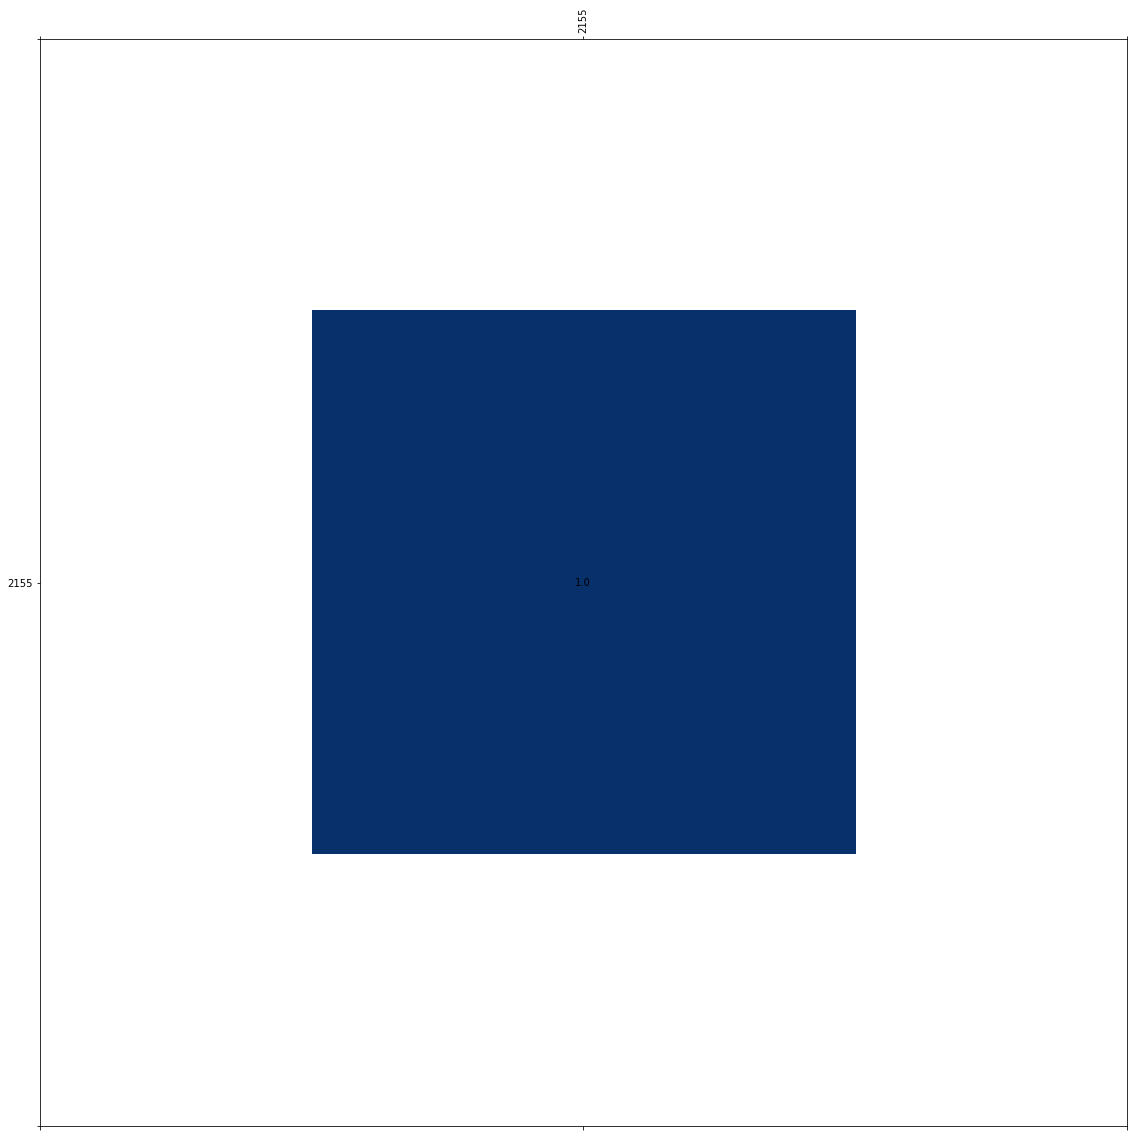

In [14]:
clust = 2
ids = np.array(pop_ids + upper_ids + lower_ids)[np.where(np.array(popclusters) == clust)[0]]
pids = [i for i in ids if i in pop_ids]
uids = [i for i in ids if i in upper_ids]
lids = [i for i in ids if i in lower_ids]
num0 = sum(np.array([len(pids), len(uids), len(lids)]) == 0)
if num0 < 2:
    print("Cluster %d: %d population, %d upper, %d lower" % (clust, len(pids), len(uids), len(lids)))
    print("___Articles in multiple clusters!\n")

clust_dict = dd.dict_by_ids(article_df, ids)
clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))
# Cluster 21: 3 population, 1 upper, 0 lower
#[ 14774  41674  58841 119198] [14774, 41674, 58841] [119198] []

# though 119198 is in the "Upper" label and the others are not, 
# it completely matches with 14774, 58841

In [15]:
for i in ids:
    print(article_df.loc[article_df["id"] == i, "paywall"].iloc[0], i, full_dict[i], "\n")

0.5 2155 These are external links and will open in a new window
 Correspondents' Dinner joke targets Trump Jump to media player US comedian Hasan Minhaj had a dig at the president during the White House Correspondents' Dinner, which the president snubbed. 



In [16]:
# id2 = 41674 previously clustered with 58841, 14774, etc. but not the same document (entities different)
id1 = 73887
id2 = 30860

id1 = ids[6]
id2 = ids[7]
doc1 = full_dict[id1]
doc2 = full_dict[id2]
dd.entities = True
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
match_mat = dd.get_match_matrix(jac_mat)
utils.display_mat(jac_mat * match_mat)
print(article_df.loc[id1, "url"])
print(article_df.loc[id2, "url"])
display(article_df.loc[[id1, id2], ])

IndexError: index 6 is out of bounds for axis 0 with size 1

In [ ]:
print(full_dict[id1], "\n")
full_dict[id1].sent_entities

In [ ]:
print(full_dict[id2], "\n")
full_dict[id2].sent_entities

In [ ]:
print("Cosine similarity: %.2f\n" % (utils.cosinesim(full_dict[id1].vec, full_dict[id2].vec)))
print("Entity similarity (article level)")
dd.jaccard_index(utils.flatten(full_dict[id1].sent_entities), utils.flatten(full_dict[id2].sent_entities), visualize= True, union_subset = True)

In [ ]:
print("Similarity score:", dd.jaccard_score(), dd.jaccard_score(weighted = False))
dd.print_sentence_matches(thresh_jaccard = 0.5, visualize = True)
utils.display_mat(dd.get_jaccard_matrix())
utils.display_mat(dd.entities_mat)
utils.display_mat(dd.get_jaccard_matrix() * dd.entities_mat)
np.sum(dd.get_jaccard_matrix() * dd.entities_mat)